# Secure and Private AI : Part 2 - Neural Networks in PyTorch (Exercises)

Source : https://classroom.udacity.com/courses/ud185/lessons/8a993162-65c4-4a80-bd35-47d9f3a6f5bc/concepts/70526adf-40d3-4446-ac32-d3f798739745#

In [69]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [70]:
# download images including figures to recognize

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [71]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print('type(images) : ')
print(type(images))
print('images.shape : ')
print(images.shape)
print('labels.shape : ')
print(labels.shape)


type(images) : 
<class 'torch.Tensor'>
images.shape : 
torch.Size([64, 1, 28, 28])
labels.shape : 
torch.Size([64])


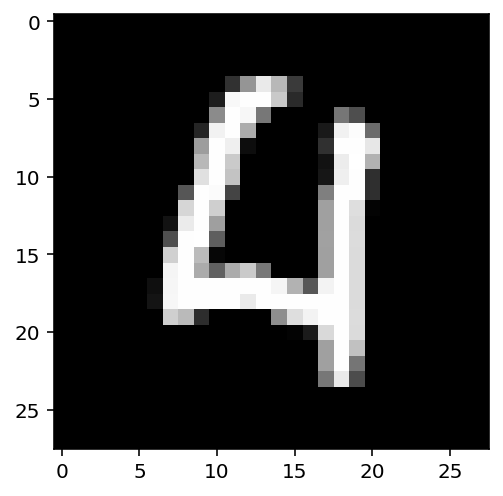

In [72]:
# display one image

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

## Exercise: 

1. Flatten the batch of images images. See https://pytorch.org/docs/stable/torch.html#torch.flatten
2. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. 

For now, use a sigmoid activation for the hidden layer. 
Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [1]:
## Your solution

def activation(x):
    return 1/(1+torch.exp(-x))

# inputs = torch.flatten(images)
inputs = images.view(images.shape[0], -1)
# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2 # output of your network, should have shape (64,10)
print(out)

NameError: name 'images' is not defined

## Exercise: 

1. Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. 

Note that you'll need to pay attention to the shapes when doing this. 

A. If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. 

The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator.

So you need b to have a shape of (64, 1). 

This way PyTorch will divide the 10 values in each row of 'a' by the one value in each row of 'b'. 
'
Pay attention to how you take the sum as well. 

1. You'll need to define the dim keyword in torch.sum. 
2. Setting dim=0 takes the sum across the rows while dim=1 takes the sum across the columns.

In [74]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch

PyTorch provides a module nn that makes building networks much simpler. 

Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [75]:
from torch import nn

In [76]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [77]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [78]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

## Exercise: 

1. Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, 
2. then a hidden layer with 64 units and a ReLU activation, 
3. and finally an output layer with a softmax activation as shown above. 

You can use a ReLU activation with the nn.ReLU module or F.relu function.


HINT : It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer. As you code your solution, use fc1, fc2, and fc3 as your layer names.

In [79]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(784, 128)
        # Output layer, 10 units - one for each digit
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [80]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0275,  0.0114, -0.0200,  ...,  0.0082,  0.0105,  0.0013],
        [-0.0329, -0.0207,  0.0299,  ..., -0.0202,  0.0338,  0.0142],
        [ 0.0187,  0.0115,  0.0148,  ...,  0.0082, -0.0069, -0.0235],
        ...,
        [-0.0160, -0.0043,  0.0133,  ...,  0.0289, -0.0234, -0.0295],
        [ 0.0008,  0.0087, -0.0107,  ...,  0.0169,  0.0172,  0.0253],
        [-0.0172, -0.0169,  0.0292,  ..., -0.0216, -0.0117,  0.0242]],
       requires_grad=True)
Parameter containing:
tensor([-0.0087, -0.0065, -0.0074,  0.0183,  0.0198,  0.0112, -0.0180,  0.0023,
        -0.0313, -0.0017,  0.0059,  0.0179, -0.0348, -0.0271,  0.0289, -0.0218,
        -0.0349,  0.0230,  0.0251,  0.0121,  0.0112, -0.0171, -0.0222, -0.0187,
         0.0180, -0.0164,  0.0103,  0.0128,  0.0199,  0.0274,  0.0249, -0.0057,
        -0.0093,  0.0261,  0.0092,  0.0072, -0.0179,  0.0306, -0.0021, -0.0200,
         0.0217,  0.0253,  0.0149, -0.0018, -0.0171, -0.0097,  0.0106,  0.0302,
         0.0026

In [81]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0275,  0.0114, -0.0200,  ...,  0.0082,  0.0105,  0.0013],
        [-0.0329, -0.0207,  0.0299,  ..., -0.0202,  0.0338,  0.0142],
        [ 0.0187,  0.0115,  0.0148,  ...,  0.0082, -0.0069, -0.0235],
        ...,
        [-0.0160, -0.0043,  0.0133,  ...,  0.0289, -0.0234, -0.0295],
        [ 0.0008,  0.0087, -0.0107,  ...,  0.0169,  0.0172,  0.0253],
        [-0.0172, -0.0169,  0.0292,  ..., -0.0216, -0.0117,  0.0242]],
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [83]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0078,  0.0095, -0.0036,  ...,  0.0071,  0.0146,  0.0063],
        [ 0.0010,  0.0006, -0.0001,  ..., -0.0100,  0.0074,  0.0048],
        [-0.0031,  0.0043,  0.0034,  ...,  0.0015,  0.0080, -0.0077],
        ...,
        [-0.0044,  0.0021, -0.0046,  ...,  0.0097, -0.0094,  0.0094],
        [ 0.0127, -0.0035, -0.0029,  ..., -0.0130,  0.0051,  0.0059],
        [ 0.0003,  0.0035,  0.0014,  ...,  0.0022,  0.0069,  0.0070]])

## Forward pass

Now that we have a network, let's see what happens when we pass in an image.

As you can see above, our network has basically no idea what this digit is. 

It's because we haven't trained it yet, all the weights are random!

In [84]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!

### Using `nn.Sequential`

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, `nn.Sequential` ([documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)). Using this to build the equivalent network:


In [85]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [86]:
print('model[0] :')
print(model[0])
print('model[0].weight : ')
model[0].weight

model[0] :
Linear(in_features=784, out_features=128, bias=True)
model[0].weight : 


Parameter containing:
tensor([[-0.0265,  0.0257,  0.0099,  ..., -0.0191, -0.0272, -0.0022],
        [ 0.0045, -0.0074, -0.0298,  ..., -0.0334, -0.0355,  0.0267],
        [ 0.0127, -0.0166, -0.0050,  ..., -0.0306, -0.0041, -0.0212],
        ...,
        [ 0.0288, -0.0229,  0.0030,  ..., -0.0190, -0.0303,  0.0076],
        [-0.0103, -0.0052,  0.0308,  ...,  0.0225, -0.0185,  0.0263],
        [-0.0266,  0.0273,  0.0299,  ...,  0.0159,  0.0048,  0.0118]],
       requires_grad=True)

You can also pass in an OrderedDict to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so each operation must have a different name.

In [87]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [88]:

print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)



In the next notebook, we'll see how we can train a neural network to accuractly predict the numbers appearing in the MNIST images.